### Training a Model

In [ ]:
# To use after: python -m gensim.scripts.word2vec2tensor -i model_barry.txt -o model_harry   

In [4]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import json

# ler o ficheiro .txt
with open('harry.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

# dividir o texto em frases
frases = sent_tokenize(texto, language='portuguese')

# tokenizar cada frase em palavras e filtrar apenas palavras alfabéticas
sentences = [
    [token.lower() for token in word_tokenize(frase, language='portuguese') if token.isalpha()]
    for frase in frases
]

# guardar o resultado num ficheiro (por exemplo, JSON para ser mais fácil de ler)
with open('tokenized_output.json', 'w', encoding='utf-8') as f_out:
    json.dump(sentences, f_out, ensure_ascii=False, indent=4)


In [5]:
from gensim.models import Word2Vec
import os

# define training data
model = Word2Vec(sentences, vector_size=300, window=5, min_count=5, sg=1, epochs=10, workers= os.cpu_count()  # usar todos os cores disponíveis
)

At its core, word2vec model parameters are stored as matrices (NumPy arrays). Each array is `#vocabulary` (controlled by the min_count parameter) times vector size (the vector_size parameter) of floats (single precision aka 4 bytes).

Three such matrices are held in RAM (work is underway to reduce that number to two, or even one). So if your input contains 100,000 unique words, and you asked for layer vector_size=200, the model will require approx. `100,000 * 200 * 4 * 3 bytes = ~229MB`.

(There’s a little extra memory needed for storing the vocabulary tree.)

In [6]:
model.wv['harry']

array([-1.84030905e-01,  9.11327749e-02, -1.09555818e-01, -2.81673260e-02,
        1.36999022e-02, -1.81979254e-01,  6.11389764e-02,  3.49482834e-01,
       -5.42730326e-03, -1.19455688e-01,  8.40361044e-02,  5.52583411e-02,
       -9.11551118e-02,  2.18221411e-01, -2.03286335e-01, -9.92853343e-02,
        4.67184233e-03, -1.03192022e-02,  8.03376213e-02, -5.89037761e-02,
       -8.95591304e-02, -6.57082722e-02,  1.14716209e-01, -6.96291700e-02,
       -1.10220790e-01, -2.69992440e-03, -2.28130296e-01,  2.57863738e-02,
        4.75893542e-02, -2.48787090e-01, -7.98035935e-02, -1.53421089e-01,
        4.31659035e-02,  6.31416887e-02,  7.46099427e-02,  1.00291818e-01,
        1.32252797e-01, -1.81118727e-01, -1.04157120e-01,  1.36874095e-01,
       -1.43746445e-02, -3.97683913e-03,  4.55974005e-02,  7.64091313e-02,
        2.03811496e-01,  1.78950861e-01, -1.00448243e-01, -8.19105953e-02,
        3.26404646e-02, -7.71749690e-02, -4.23118025e-02,  1.05016172e-01,
        1.71681345e-01,  

In [7]:
model.wv['capítulo']

array([-0.02001183,  0.1089725 , -0.04236833, -0.06345466,  0.06273395,
       -0.08272295,  0.02883521,  0.2088183 ,  0.0365558 , -0.09784821,
        0.06034605, -0.04357911,  0.00320988,  0.05229406, -0.05849967,
       -0.1417208 ,  0.03929309, -0.04227769,  0.02495888,  0.00587682,
       -0.07009769, -0.04856802,  0.06026295, -0.02563735,  0.08526797,
       -0.02137797, -0.08934803, -0.0540291 , -0.02685615, -0.12592912,
       -0.01217778, -0.05385551, -0.02954619, -0.05478734,  0.10825375,
       -0.01971409,  0.06602314, -0.1694468 , -0.00080611, -0.019547  ,
       -0.06661191,  0.04684769,  0.02264502, -0.04203616,  0.05981813,
        0.05339516,  0.01916335, -0.05116376, -0.07959706,  0.01961955,
       -0.04780002, -0.03222501, -0.058178  ,  0.00502013, -0.02866307,
        0.1277822 ,  0.06716888, -0.04803839,  0.0149405 , -0.03964416,
       -0.01128126, -0.07932068, -0.05702534,  0.00514165,  0.01126657,
       -0.0082617 ,  0.04786079,  0.00976098, -0.05275337,  0.01

In [8]:
def get_word(word):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '"+word+"' does not appear in this model")

In [9]:
get_word("advanced")

The word 'advanced' does not appear in this model


### Online training / Resuming training

In [10]:
more_sentences = [
    ['Advanced', 'users', 'can', 'load', 'a', 'model',
     'and', 'continue', 'training', 'it', 'with', 'more', 'sentences',"ds"],
]

model.build_vocab(more_sentences, update=True)
model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)
get_word("Advanced")


The word 'Advanced' does not appear in this model


### Vocabulary Length

In [11]:
len(model.wv)

1996

In [12]:
model.wv.index_to_key

['de',
 'que',
 'a',
 'e',
 'o',
 'harry',
 'para',
 'um',
 'não',
 'se',
 'os',
 'uma',
 'com',
 'do',
 'em',
 'disse',
 'da',
 'ele',
 'rony',
 'na',
 'é',
 'no',
 'você',
 'por',
 'mas',
 'as',
 'mais',
 'eu',
 'como',
 'à',
 'estava',
 'foi',
 'quando',
 'ao',
 'muito',
 'era',
 'dos',
 'está',
 'lockhart',
 'sua',
 'seu',
 'ela',
 'me',
 'coisa',
 'weasley',
 'das',
 'bem',
 'cabeça',
 'olhos',
 'perguntou',
 'até',
 'eles',
 'hagrid',
 'sem',
 'vez',
 'hermione',
 'mione',
 'voz',
 'ser',
 'dumbledore',
 'dobby',
 'só',
 'então',
 'isso',
 'porta',
 'ter',
 'meu',
 'dois',
 'tinha',
 'pelo',
 'vai',
 'riddle',
 'fazer',
 'malfoy',
 'agora',
 'potter',
 'seus',
 'draco',
 'ainda',
 'parecia',
 'depois',
 'vamos',
 'senhor',
 'dizer',
 'gina',
 'sobre',
 'varinha',
 'quase',
 'sala',
 'já',
 'aqui',
 'dele',
 'ver',
 'pela',
 'nunca',
 'lhe',
 'fora',
 'lado',
 'vocês',
 'escola',
 'ah',
 'fred',
 'nada',
 'rosto',
 'estavam',
 'carro',
 'todos',
 'alunos',
 'tão',
 'quem',
 'nos',

### Saving and Loading 

In [13]:
model.save("models/word2vec.model")

model = Word2Vec.load("models/word2vec.model")


In [14]:
# Store just the words + their trained embeddings.

from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save("models/word2vec.wordvectors")

wv = KeyedVectors.load("models/word2vec.wordvectors")
vector = wv['harry'] 
print(vector)




[-1.84030905e-01  9.11327749e-02 -1.09555818e-01 -2.81673260e-02
  1.36999022e-02 -1.81979254e-01  6.11389764e-02  3.49482834e-01
 -5.42730326e-03 -1.19455688e-01  8.40361044e-02  5.52583411e-02
 -9.11551118e-02  2.18221411e-01 -2.03286335e-01 -9.92853343e-02
  4.67184233e-03 -1.03192022e-02  8.03376213e-02 -5.89037761e-02
 -8.95591304e-02 -6.57082722e-02  1.14716209e-01 -6.96291700e-02
 -1.10220790e-01 -2.69992440e-03 -2.28130296e-01  2.57863738e-02
  4.75893542e-02 -2.48787090e-01 -7.98035935e-02 -1.53421089e-01
  4.31659035e-02  6.31416887e-02  7.46099427e-02  1.00291818e-01
  1.32252797e-01 -1.81118727e-01 -1.04157120e-01  1.36874095e-01
 -1.43746445e-02 -3.97683913e-03  4.55974005e-02  7.64091313e-02
  2.03811496e-01  1.78950861e-01 -1.00448243e-01 -8.19105953e-02
  3.26404646e-02 -7.71749690e-02 -4.23118025e-02  1.05016172e-01
  1.71681345e-01  1.56461447e-01  2.39729732e-02  1.04577772e-01
  1.58996269e-01 -2.41871066e-02  1.43562898e-01 -3.66823152e-02
 -1.77207477e-02 -7.59045

By default, it uses pickle internally, optionally mmap‘ing the model’s internal large NumPy matrices into virtual memory directly from disk files, for inter-process memory sharing.

In addition, you can load models created by the original C tool, both using its text and binary formats:

In [15]:
word_vectors.save_word2vec_format('models/vectors.txt', binary=False)
word_vectors.save_word2vec_format('models/vectors.bin', binary=True)

In [16]:
model_txt = KeyedVectors.load_word2vec_format('models/vectors.txt', binary=False)
model_bin = KeyedVectors.load_word2vec_format('models/vectors.bin', binary=True)

### Available Models

In [17]:
import gensim.downloader
# Show all available models in gensim-data
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [18]:
# Load the model
model_wv = Word2Vec.load("models/word2vec.model") #desta forma para ver os most similars 
#em vez de coloharrymos model_wv.most_similar('conceito') tem de ser model_wv.wv.most_similar('conceito')
#model_wv = KeyedVectors.load("models/word2vec.wordvectors") #normal model_wv.most_similar('conceito')


In [19]:
model.wv.save_word2vec_format('model_barry.txt', binary=False)

### Similarity

In [21]:
model_wv.wv.most_similar('harry')

[('draco', 0.814492404460907),
 ('mione', 0.8103359937667847),
 ('baixinho', 0.8025956749916077),
 ('wood', 0.8000319004058838),
 ('colin', 0.799370288848877),
 ('ansioso', 0.7970106601715088),
 ('ele', 0.7943055629730225),
 ('hagrid', 0.7824476957321167),
 ('rispidez', 0.7791721820831299),
 ('ernie', 0.7786813378334045)]

In [22]:
model_wv.wv.most_similar('snape')

[('professora', 0.9252505898475647),
 ('severo', 0.9241222739219666),
 ('filch', 0.9169071316719055),
 ('argo', 0.9130796790122986),
 ('rispidamente', 0.9097428917884827),
 ('olá', 0.907974362373352),
 ('colin', 0.9055598974227905),
 ('creevey', 0.9052742123603821),
 ('irritado', 0.9037927389144897),
 ('decidida', 0.902057409286499)]

In [ ]:
print(model_wv.similarity("harry","draco"))
print(model_wv.similarity("harry","voldemort"))
print(model_wv.similarity("harry","casa"))


0.8369248
0.44731778
0.39731202


In [29]:
pairs = [
    ('harry', 'potter'),   
    ('harry', 'aluno'),   
    ('harry', 'mágico'),  
    ('harry', 'mau'),    
    ('harry', 'bom'),
]
for w1, w2 in pairs:
    if w1 in model_wv.wv and w2 in model_wv.wv:
        print('%s \t %s \t% .2f' % (w1, w2, model_wv.wv.similarity(w1, w2)))
    else:
        print(f'Uma ou ambas as palavras não estão no vocabulário: {w1}, {w2}')

harry 	 potter 	 0.46
harry 	 aluno 	 0.42
harry 	 mágico 	 0.52
harry 	 mau 	 0.55
harry 	 bom 	 0.49


### Intruso - Which one is the odd one out in this list?

In [ ]:
model_wv.wv.doesnt_match(["harry","snape","France"]) #doesnt_match não está o espectável...

'harry'

### Analogies

<img src="analogia.png">

In [33]:
result = model_wv.wv.most_similar(positive=['rapaz', 'baixinho'], negative=['draco'])
print(result[0])

('salvar', 0.9417012929916382)


In [35]:
model_wv.wv.most_similar("harry", topn=50)

[('draco', 0.814492404460907),
 ('mione', 0.8103359937667847),
 ('baixinho', 0.8025956749916077),
 ('wood', 0.8000319004058838),
 ('colin', 0.799370288848877),
 ('ansioso', 0.7970106601715088),
 ('ele', 0.7943055629730225),
 ('hagrid', 0.7824476957321167),
 ('rispidez', 0.7791721820831299),
 ('ernie', 0.7786813378334045),
 ('depressa', 0.7728924751281738),
 ('rony', 0.7718433737754822),
 ('franzindo', 0.7702134251594543),
 ('hermione', 0.7701510190963745),
 ('furioso', 0.7677258849143982),
 ('lentamente', 0.7662733197212219),
 ('erguendo', 0.7631052136421204),
 ('rouco', 0.7617624998092651),
 ('gina', 0.7607182860374451),
 ('olhando', 0.757716178894043),
 ('cuidado', 0.7557263374328613),
 ('impaciente', 0.755174994468689),
 ('desesperado', 0.7545778751373291),
 ('curioso', 0.7495245337486267),
 ('riddle', 0.7477547526359558),
 ('apontando', 0.747365415096283),
 ('ligeiramente', 0.7434484362602234),
 ('cochichou', 0.743141770362854),
 ('trêmula', 0.7425721287727356),
 ('nervoso', 0.7416

In [36]:
def analogy( x2, y1, x1):
    result = model_wv.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [39]:
analogy('rapaz', 'ansioso', 'baixinho') #?

'quisesse'

### Visualisation

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None):
    word_vectors = []
    valid_words = []
    
    for w in words:
        if w in model.wv:
            word_vectors.append(model.wv[w])
            valid_words.append(w)
        else:
            print(f'"{w}" não está no vocabulário.')
    
    if not word_vectors:
        print("Nenhuma palavra válida foi encontrada.")
        return

    word_vectors = np.array(word_vectors)
    twodim = PCA(n_components=2).fit_transform(word_vectors)

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(valid_words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.title("Word2Vec - Projeção PCA")
    plt.show()

"despareceu" não está no vocabulário.
"aleatório" não está no vocabulário.
"exame" não está no vocabulário.


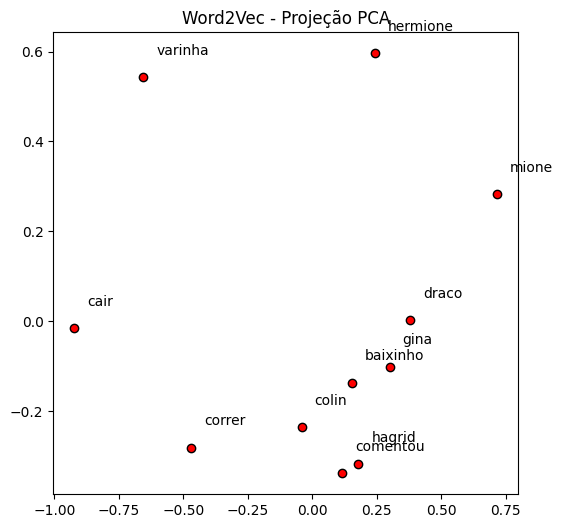

In [46]:
words2 =  ['draco','mione','baixinho','colin','hagrid','hermione','gina',
           'comentou','despareceu','varinha','aleatório','correr','cair','exame']
display_pca_scatterplot(model_wv,words2)

In [49]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, words):
    arr = np.empty((0, model.vector_size), dtype='f')
    valid_words = []

    for word in words:
        if word in model.wv:
            wrd_vector = model.wv[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
            valid_words.append(word)
        else:
            print(f'"{word}" não está no vocabulário.')

    if len(valid_words) == 0:
        print("Nenhuma palavra válida encontrada.")
        return

    tsne = TSNE(n_components=2, perplexity=10, n_iter=5000, random_state=42)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(valid_words, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points')
    
    plt.title("Word2Vec - Projeção t-SNE")
    plt.xlim(x_coords.min() - 1, x_coords.max() + 1)
    plt.ylim(y_coords.min() - 1, y_coords.max() + 1)
    plt.show()

In [50]:
words =  ['draco','mione','baixinho','colin','hagrid','hermione','gina',
           'comentou','varinha','correr','cair']

c:\Users\flavi\Desktop\PLNB\Aula10\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


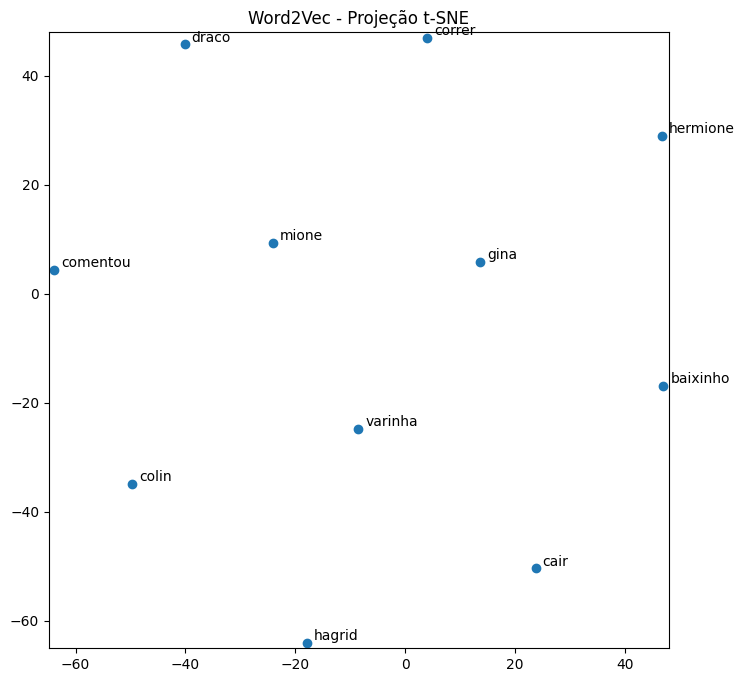

In [51]:
display_closestwords_tsnescatterplot(model_wv, words)